In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# Main function:

In [58]:
def SetUpMap (size, per, seed=None):
    if (seed != None):
        np.random.seed = seed
    
    if (seed == -1):
        return np.array([[ int(i == size // 2 and j == size // 2) for i in range(size)] for j in range(size)])
    
    return np.array([[ int(np.random.randint(0, 100) < per) for i in range(size)] for j in range(size)])

In [57]:
def GetScoreT (field, b, i, j):  
    n = len(field)
    offset = np.arange(-1, 2, 1)
    neighbors = 1 - field[ (i + offset.reshape(3, -1)) % n, (j + offset) % n ]
    
    neighbors[ 0,  0] = 0
    neighbors[-1, -1] = 0
    
    if (field[i, j] == 1): # Defectors 
        return np.sum(neighbors, dtype=np.int) * b
    else:                  # Cooperators
        return np.sum(neighbors, dtype=np.int)

In [4]:
def GetBestStategyT (field, scores, i, j):
    n = len(field)
    offset = np.arange(-1, 2, 1)
    neighborsScores = scores[(i + offset.reshape(3, -1)) % n, (j + offset) % n]
    
    neighborsScores[ 0,  0] = 0
    neighborsScores[-1, -1] = 0
    
    #k = neighborsScores.argmax(axis=0) - 1
    k = neighborsScores.argmax()
    x = k // 3
    y = k % 3
    
    #return field[ (k[0]+i)%n, (k[1]+j)%n ]
    return field[ (x+i-1)%n, (y+j-1)%n ]

In [5]:
def NextGen (field, b):
    n = len(field)
    
    scores = np.array([[GetScoreT(field, b, i, j) for j in range(n)] for i in range(n)])
    
    return np.array([[GetBestStategyT(field, scores, i, j) for j in range(n)] for i in range(n)])

In [26]:
def Draw(field, pointSize=10):
    plt.figure(figsize = (20,20))
    plt.imshow(field)
    y, x = (1-field).nonzero()
    plt.scatter(size + x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=pointSize, marker='h', c='r')
    y, x = field.nonzero()
    plt.scatter(size + x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=pointSize, marker='h')

# Main program:

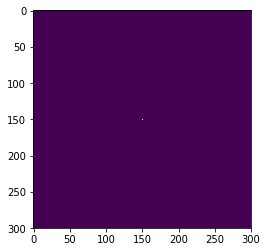

In [59]:
b = 2.34
size = 300
field = SetUpMap(size, 1, -1)

plt.imshow(field)

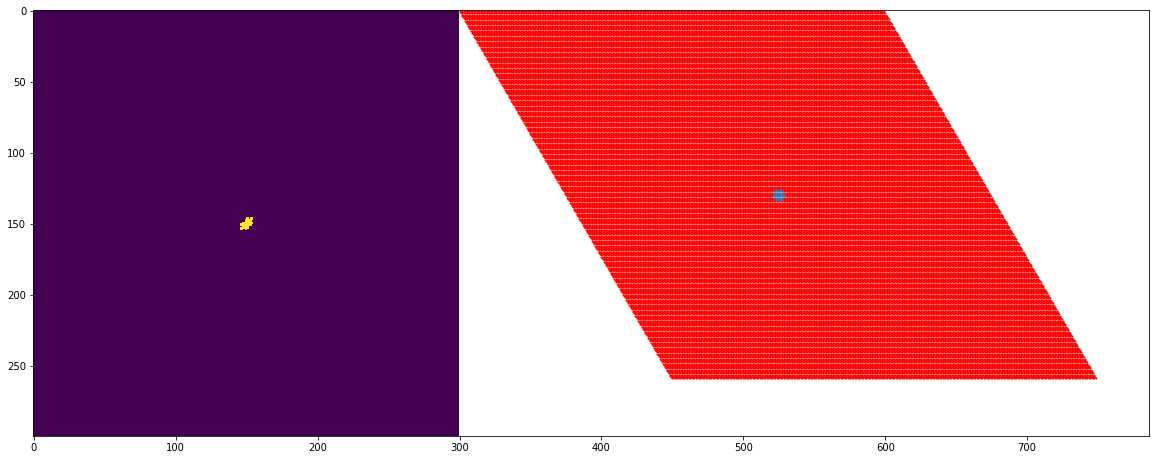

In [63]:
field = NextGen (field, b)

Draw(field, 1)

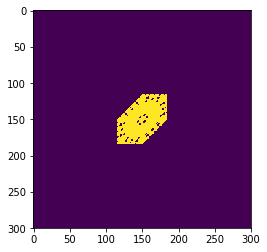

In [64]:
for i in range(30):
    field = NextGen (field, b)
    plt.imshow(field)

y, x = (1 - field).nonzero()

xDown = np.delete(x, np.where(y%2==0))
yDown = np.delete(y, np.where(y%2==0))
xUp = np.delete(x, np.where(y%2==1))
yUp = np.delete(y, np.where(y%2==1))

plt.scatter(xDown*np.cos(np.pi/6)*2 + yDown*np.cos(np.pi/6), (size - yDown) * np.sin(np.pi/3), s=60, marker="o", c="b")
plt.scatter(xUp  *np.cos(np.pi/6)*2 + yUp  *np.cos(np.pi/6), (size - yUp)   * np.sin(np.pi/3), s=60, marker="o", c="b")

#plt.scatter(x*np.cos(np.pi/6)*2 + y*np.cos(np.pi/6), (size-y) * np.sin(np.pi/3), s=50, marker="^")


y, x = field.nonzero()

xDown = np.delete(x, np.where(y%2==0))
yDown = np.delete(y, np.where(y%2==0))
xUp = np.delete(x, np.where(y%2==1))
yUp = np.delete(y, np.where(y%2==1))

plt.scatter(xDown*np.cos(np.pi/6)*2 + yDown*np.cos(np.pi/6), (size - yDown) * np.sin(np.pi/3), s=60, marker="o", c="r")
plt.scatter(xUp  *np.cos(np.pi/6)*2 + yUp  *np.cos(np.pi/6), (size - yUp)   * np.sin(np.pi/3), s=60, marker="o", c="r")